In [1]:
from datasets import load_dataset

# source: https://huggingface.co/datasets/ucberkeley-dlab/measuring-hate-speech
dataset1 = load_dataset("ucberkeley-dlab/measuring-hate-speech")

print(f"Number of Columns: {dataset1['train'].num_columns}")
print(f"Number of Rows: {dataset1['train'].num_rows}")

Found cached dataset parquet (/Users/ngocle/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-c32713cabe528196/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Number of Columns: 131
Number of Rows: 135556


In [2]:
# Rename features
dataset1['train'] = dataset1['train'].rename_column("sentiment", "pos/neg sentiment")
dataset1['train'] = dataset1['train'].rename_column("respect", "(dis)respect")
dataset1['train'] = dataset1['train'].rename_column("status", "inf/sup status")
dataset1['train'] = dataset1['train'].rename_column("hatespeech", "bias motivated language")
dataset1['train'] = dataset1['train'].rename_column("hate_speech_score", "hate speech")


- sentinment: positive (0) or negative sentiment (4)
- respect: respectful (0) or disrespectful (4)
- status: superior (0) or inferior status (4)
- hate speech: bias motive language
- hate_speech_score: hate speech

In [3]:
df1 = dataset1['train'].select(range(5)).to_pandas()
df1.head()

,comment_id,annotator_id,platform,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [4]:
# Clean Target Labels
# keep only text and specific targets
column1 = dataset1['train'].column_names
column2 = ['text', 'pos/neg sentiment', '(dis)respect', 'insult', 'humiliate',
           'inf/sup status', 'dehumanize', 'violence', 'genocide',
           'attack_defend',"bias motivated language", 'hate speech']
remove_columns = set(column1)-set(column2)

dataset2 = dataset1.remove_columns(remove_columns)
dataset2

DatasetDict({
    train: Dataset({
        features: ['pos/neg sentiment', '(dis)respect', 'insult', 'humiliate', 'inf/sup status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'bias motivated language', 'hate speech', 'text'],
        num_rows: 135556
    })
})

In [5]:
df2 = dataset2['train'].select(range(135556)).to_pandas()
df2.head()

,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,genocide,attack_defend,bias motivated language,hate speech,text
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-3.90,Yes indeed. She sort of reminds me of the elde...
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,-6.52,The trans women reading this tweet right now i...
2,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,4.0,2.0,0.36,Question: These 4 broads who criticize America...
3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.26,It is about time for all illegals to go back t...
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0,1.54,For starters bend over the one in pink and kic...


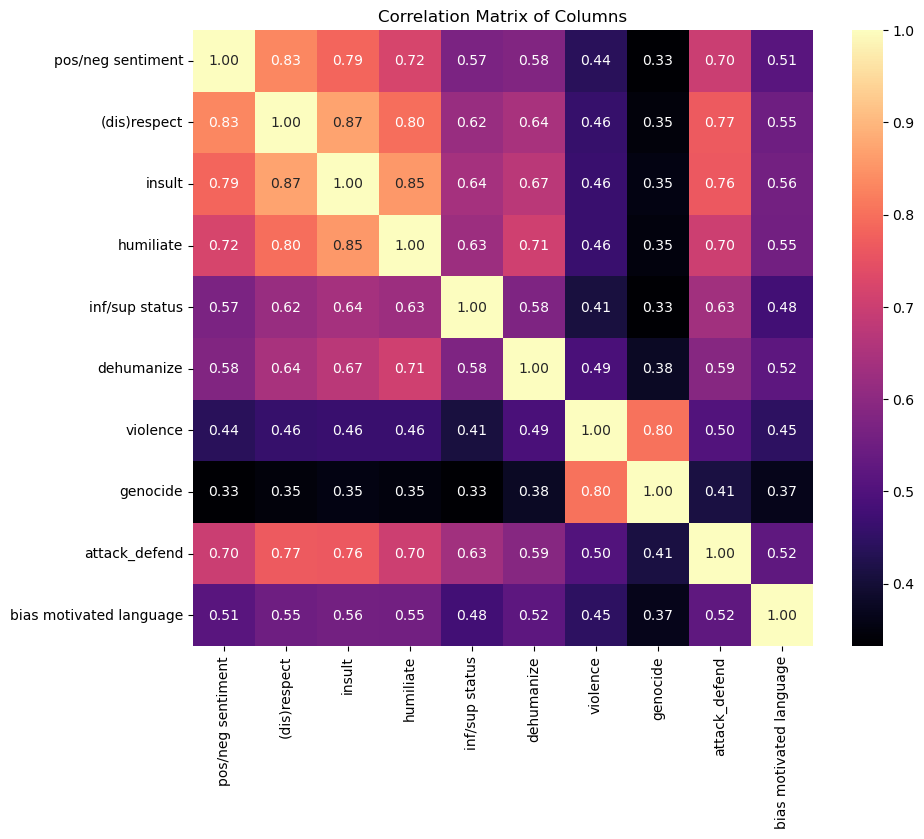

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Exclude the 'text' column and calculate the correlation matrix
correlation_matrix = df2.drop(['text','hate speech'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Columns')
plt.show()


# 0 - non-hate
# 4 - alot hate

## hate speech: 2 - hate | 1 - hate | 0 - non-hate

# 0: -8.34 --> 4.99
# 1: -6.85--> 5.09
# 2: -6.02 --> 5.09


In [7]:
df2.describe()

,pos/neg sentiment,(dis)respect,insult,humiliate,inf/sup status,dehumanize,violence,genocide,attack_defend,bias motivated language,hate speech
count,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000
mean,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,0.678413,2.625992,0.744733,-0.567428
std,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,1.179598,1.114960,0.932260,2.380003
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.340000
25%,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,-2.330000
50%,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,0.000000,-0.340000
75%,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.410000
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,6.300000


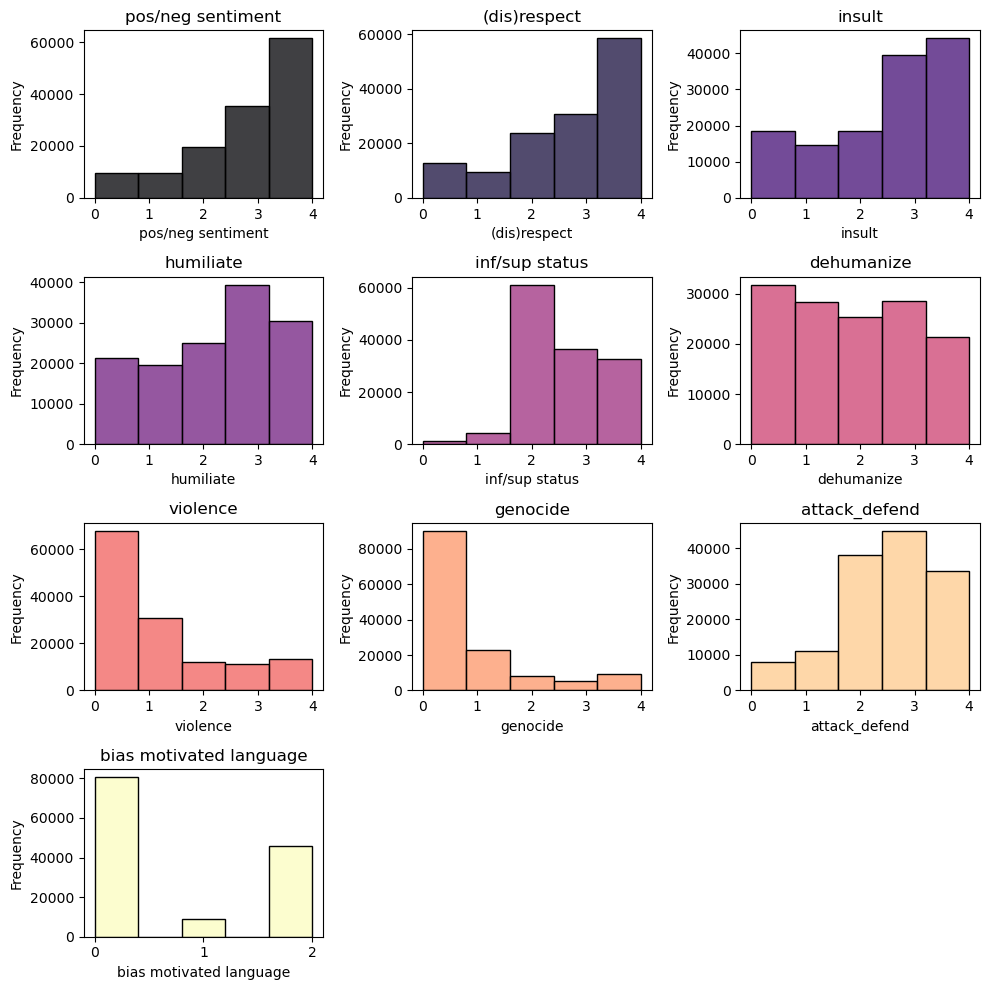

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Selecting columns to plot (all except 'text')
columns_to_plot = [col for col in df2.columns if col not in ['text', 'hate speech']][:12]


# Define colors from the magma colormap
colors = [cm.magma(i) for i in np.linspace(0, 1, len(columns_to_plot))]

# Plotting histograms with Seaborn and optimized space
plt.figure(figsize=(10, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot layout as needed
    # Choose a color from the defined colors based on the position of the subplot
    color = colors[(i-1)]  # Integer division to get the color index
    sns.histplot(df2[column], bins=5, kde=False, color=color)  
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Set x-axis to show only integer values
    plt.xticks(range(int(df2[column].min()), int(df2[column].max()) + 1))

plt.tight_layout()
plt.show()


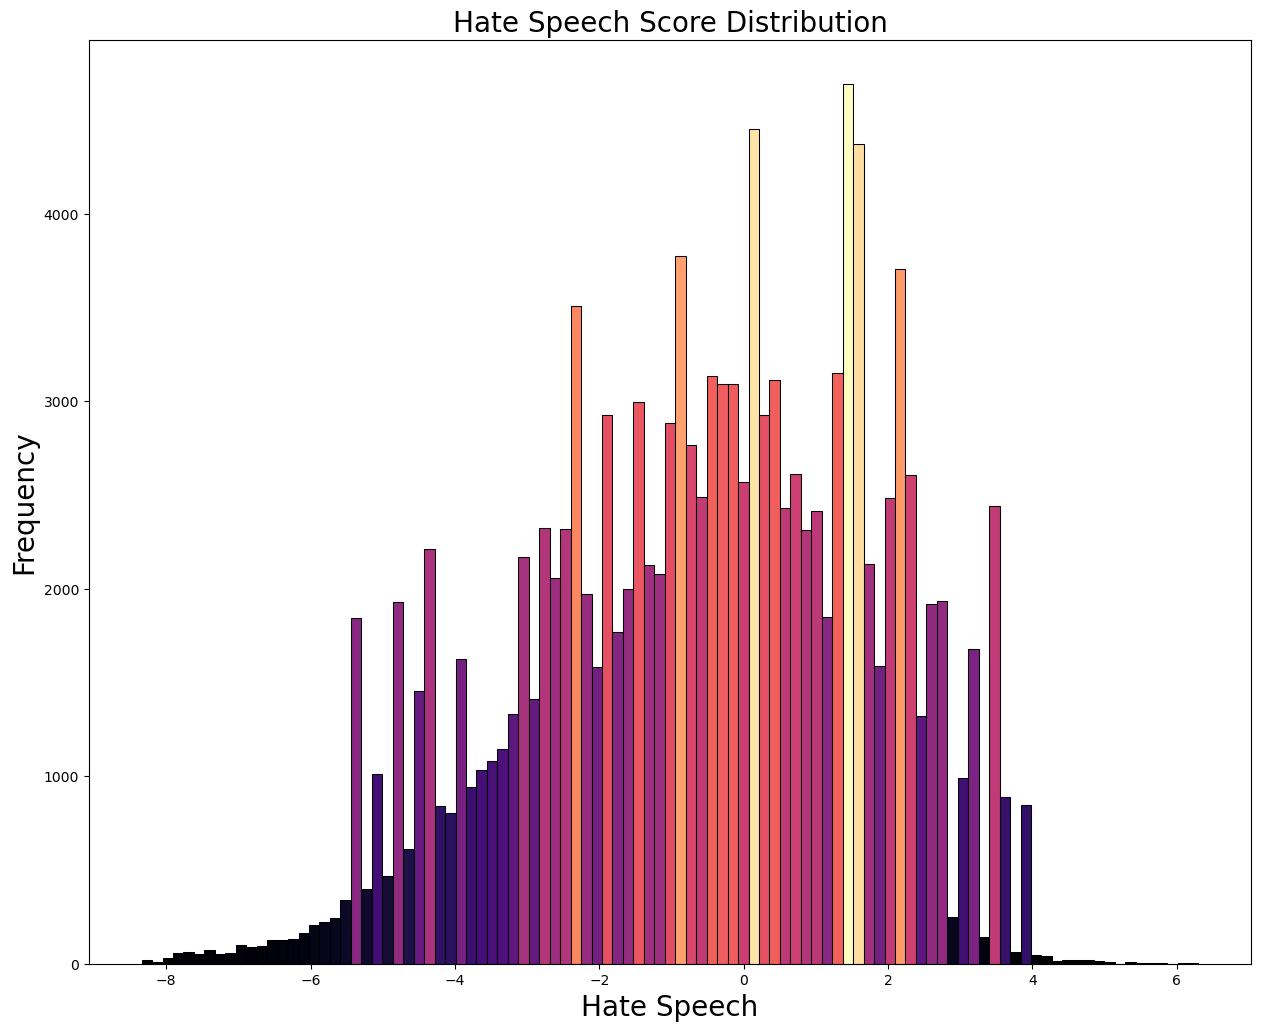

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create histogram
plt.figure(figsize=(15, 12))
ax = sns.histplot(df2['hate speech'], kde=False, color='darkred')  # Adjust bins as needed

# Get the patches used to create the histogram
patches = ax.patches

# Setting color based on the height of the patch
norm = colors.Normalize(vmin=min([p.get_height() for p in patches]), vmax=max([p.get_height() for p in patches]))
colormap = plt.cm.magma

for patch in patches:
    height = patch.get_height()
    patch.set_facecolor(colormap(norm(height)))
    #patch.set_edgecolor('none')

plt.title('Hate Speech Score Distribution', fontsize=20)
plt.xlabel('Hate Speech', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.show()


In [10]:
from datasets import Dataset

def bin_values(column, value):
    if column == 'bias motivated language':
        if value == 0:
            return False
        elif value == 1 or value ==2:
            return True
        else:
            return None
    elif column == 'hate speech':
        if value <= 0:
            return False
        else:
            return True
    else:
        if 0 <= value <= 2:
            return False
        elif 3 <= value <= 4:
            return True
        else:
            return None  

def apply_binning(example):
    for key, value in example.items():
        if key != 'text':
            example[key] = bin_values(key, value)
    return example

# Apply the function to the 'train' split of the dataset
dataset2['train'] = dataset2['train'].map(apply_binning)


Map:   0%|          | 0/135556 [00:00<?, ? examples/s]

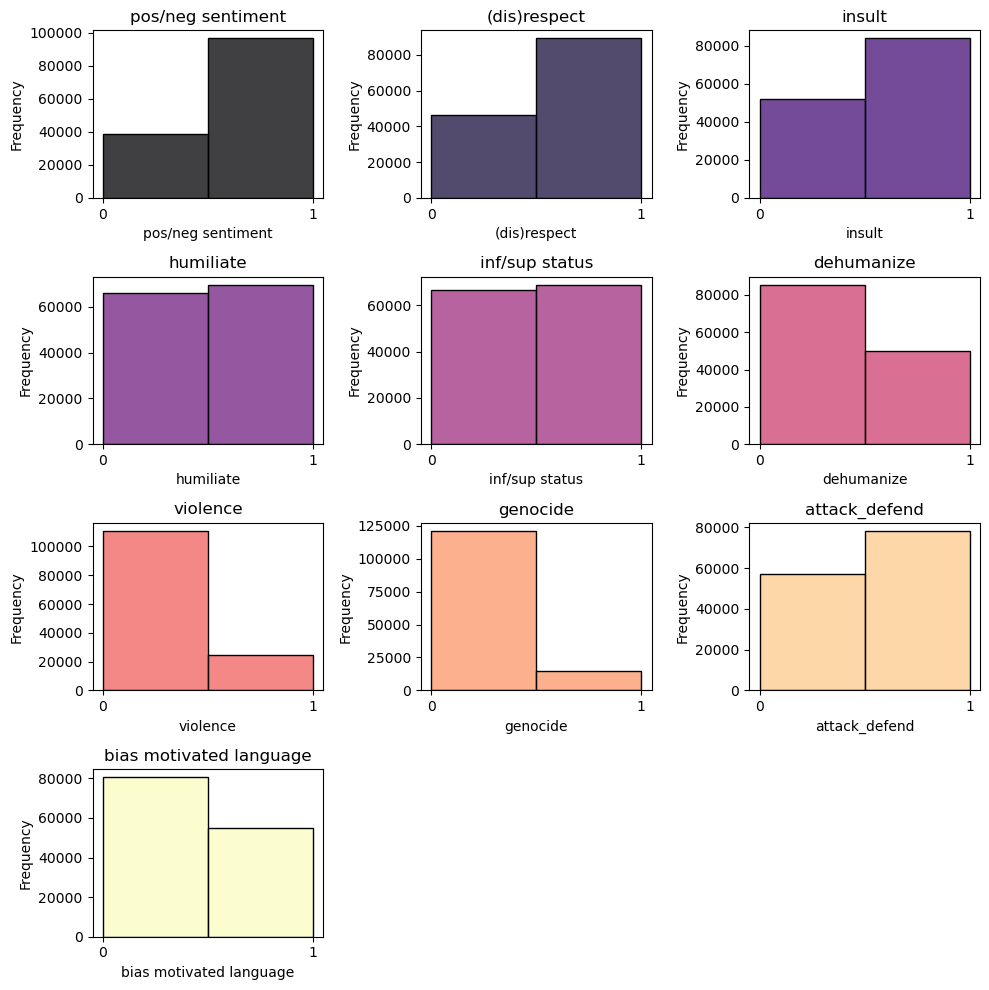

In [11]:
from datasets import Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Convert the 'train' split of dataset2 to a pandas DataFrame
df2 = dataset2['train'].to_pandas()

# Selecting columns to plot (all except 'text' and 'hate_speech')
columns_to_plot = [col for col in df2.columns if col not in ['text','hate speech']][:10]

# Define colors from the magma colormap
colors = [cm.magma(i) for i in np.linspace(0, 1, len(columns_to_plot))]

# Plotting histograms with Seaborn and optimized space
plt.figure(figsize=(10, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot layout as needed
    # Choose a color from the defined colors based on the position of the subplot
    color = colors[i - 1]  # Index to get the color
    sns.histplot(df2[column], bins=2, kde=False, color=color)  # bins set to 2 for True/False
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Set x-axis to show only integer values
    plt.xticks([0, 1])  # Since it's boolean, we only want ticks at 0 (False) and 1 (True)

plt.tight_layout()
plt.show()


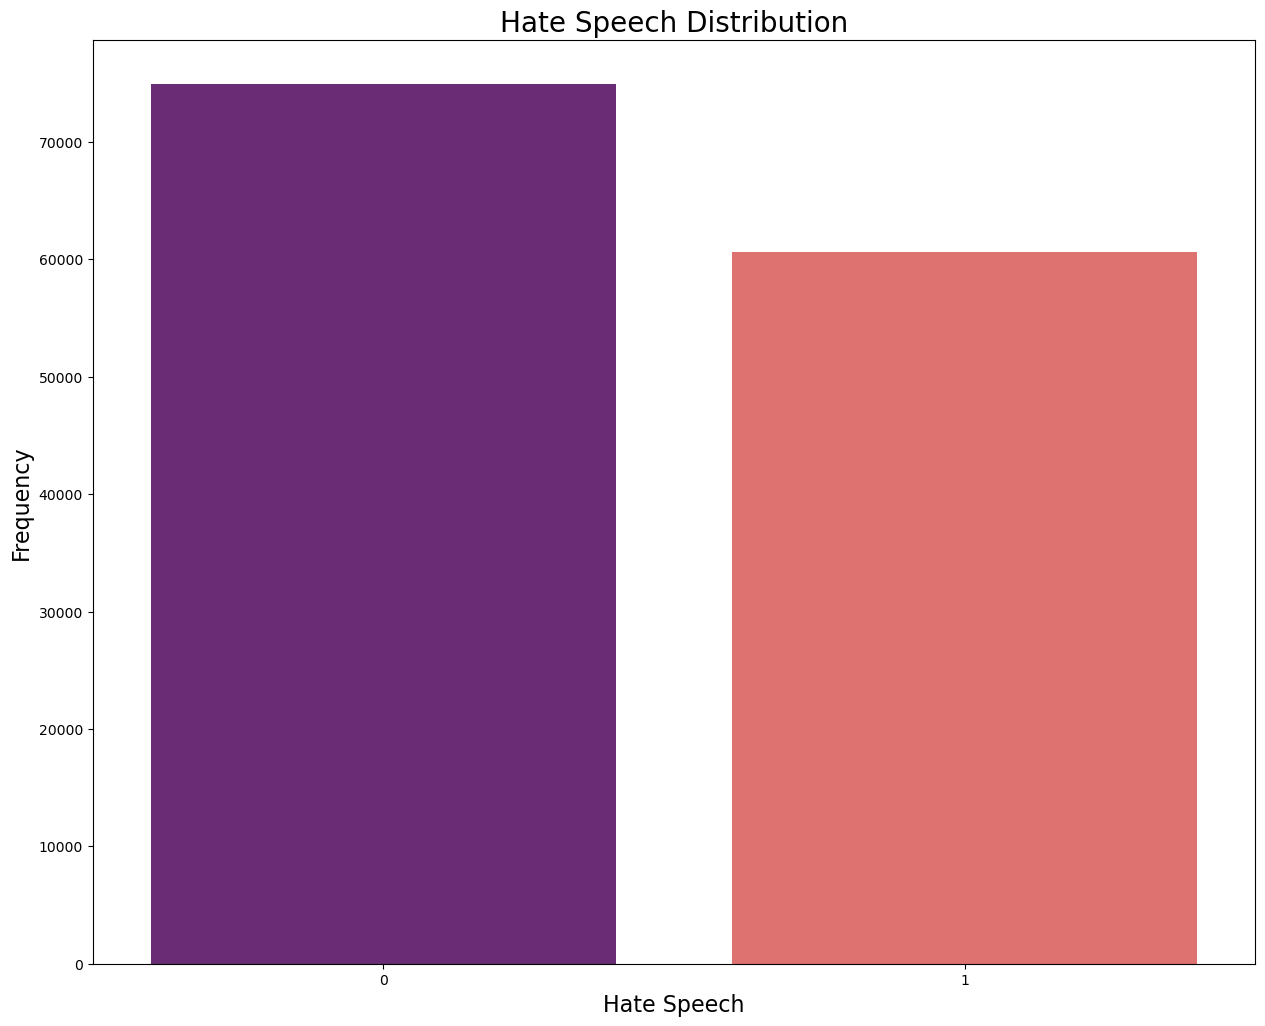

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and 'hate speech' column is already binned according to your rules

# Plot the binned data
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='hate speech', data=df2, palette='magma')
plt.title('Hate Speech Distribution', fontsize=20)
plt.xlabel('Hate Speech', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize x-axis labels if needed
ax.set_xticklabels([0, 1])

plt.show()


In [13]:
# get two-way label and label id
ID2LABEL = {}
LABEL2ID = {}

label_id = 0
for label in dataset2['train'].features.keys():
    if label in ['text']:
        continue
        
    ID2LABEL[label_id] = label
    LABEL2ID[label] = label_id
    
    label_id += 1
    
print(f"ID2LABEL:\n{ID2LABEL}\n")
print(f"LABEL2ID:\n{LABEL2ID}")

ID2LABEL:
{0: 'pos/neg sentiment', 1: '(dis)respect', 2: 'insult', 3: 'humiliate', 4: 'inf/sup status', 5: 'dehumanize', 6: 'violence', 7: 'genocide', 8: 'attack_defend', 9: 'bias motivated language', 10: 'hate speech'}

LABEL2ID:
{'pos/neg sentiment': 0, '(dis)respect': 1, 'insult': 2, 'humiliate': 3, 'inf/sup status': 4, 'dehumanize': 5, 'violence': 6, 'genocide': 7, 'attack_defend': 8, 'bias motivated language': 9, 'hate speech': 10}


In [14]:
# get target label counts and percentages
label_counts = {}
label_percentages = {}

for label in LABEL2ID:
    label_counts[label] = sum(dataset2['train'][label])
    label_percentages[label] = float(f"{sum(dataset2['train'][label]) / len(dataset2['train'])*100:.2f}")

print(f"LABEL_COUNTS:\n{label_counts}\n")
print(f"LABEL_PERCENTAGES:\n{label_percentages}")

LABEL_COUNTS:
{'pos/neg sentiment': 96678.0, '(dis)respect': 89193.0, 'insult': 83826.0, 'humiliate': 69660.0, 'inf/sup status': 68913.0, 'dehumanize': 49975.0, 'violence': 24666.0, 'genocide': 14553.0, 'attack_defend': 78351.0, 'bias motivated language': 54932.0, 'hate speech': 60602.0}

LABEL_PERCENTAGES:
{'pos/neg sentiment': 71.32, '(dis)respect': 65.8, 'insult': 61.84, 'humiliate': 51.39, 'inf/sup status': 50.84, 'dehumanize': 36.87, 'violence': 18.2, 'genocide': 10.74, 'attack_defend': 57.8, 'bias motivated language': 40.52, 'hate speech': 44.71}


In [15]:
def create_labels(batch):
    # one-hot encode targets for training
    batch['labels'] = [[float(batch[label][i]) for label in LABEL2ID] for i in range(len(batch['text']))]
    return batch

dataset2 = dataset2.map(create_labels, batched=True, remove_columns=LABEL2ID.keys())
dataset2

Map:   0%|          | 0/135556 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 135556
    })
})

In [16]:
# Convert the 'train' split of dataset2 to a pandas DataFrame
df_train = dataset2['train'].to_pandas()

# Display the first few rows of the DataFrame
df_train.head()


,text,labels
0,Yes indeed. She sort of reminds me of the elde...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,The trans women reading this tweet right now i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Question: These 4 broads who criticize America...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ..."
3,It is about time for all illegals to go back t...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
4,For starters bend over the one in pink and kic...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [17]:
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re

# Handle Diacritics using text normalization

In [18]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [19]:
df2['text'] = df2['text'].apply(simplify)

# Remove user handles

In [20]:
#test on a sample string
sample = "and @user1 i would like you to discuss with @user2 and then with @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@user1', '@user2', '@username3']

In [21]:
#remove all the user handles --> strings starting with @
df2['text'].replace(r'@\w+','',regex=True,inplace=True)

# Remove the URLs

In [22]:
#test on a sample 
sample = "https://www.takemelord.com prakhar and https://www.happy.com"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://www.takemelord.com', 'https://www.happy.com']

In [23]:
df2['text'].replace(r'http\S+','',regex=True,inplace=True)

# Tokenize using tweet tokenizier

In [24]:
#test on a sample text
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [25]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df2['text'] = df2['text'].apply(tokenizer.tokenize)

In [26]:
df2['text'].head()

0    [Yes, indeed, ., She, sort, of, reminds, me, o...
1    [The, trans, women, reading, this, tweet, righ...
2    [Question, :, These, 4, broads, who, criticize...
3    [It, is, about, time, for, all, illegals, to, ...
4    [For, starters, bend, over, the, one, in, pink...
Name: text, dtype: object

# Remove Stopwords

In [27]:
stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)

In [28]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text  

In [29]:
df2['text'] = df2['text'].apply(remove_stopwords)

In [30]:
df2['text'].head()

0    [Yes, indeed, ., She, sort, reminds, elder, la...
1    [The, trans, women, reading, tweet, right, bea...
2    [Question, :, These, 4, broads, criticize, Ame...
3    [It, time, illegals, go, back, country, origin...
4    [For, starters, bend, one, pink, kick, ass, pu...
Name: text, dtype: object

# Remove hash symbol

In [31]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)    

In [32]:
df2['text'] = df2['text'].apply(remove_hashsymbols)

# Remove special characters

In [33]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [34]:
df2['text'] = df2['text'].apply(rem_nonalpha)

# Check out the top terms in the tweets

In [35]:
from collections import Counter
results = Counter()
df2['text'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('I', 41674), ('people', 20954), ('URL', 19629), ('like', 15268), ('women', 14205), ('fucking', 12211), ('fuck', 10093), ('white', 10046), ('You', 9745), ('get', 9401)]


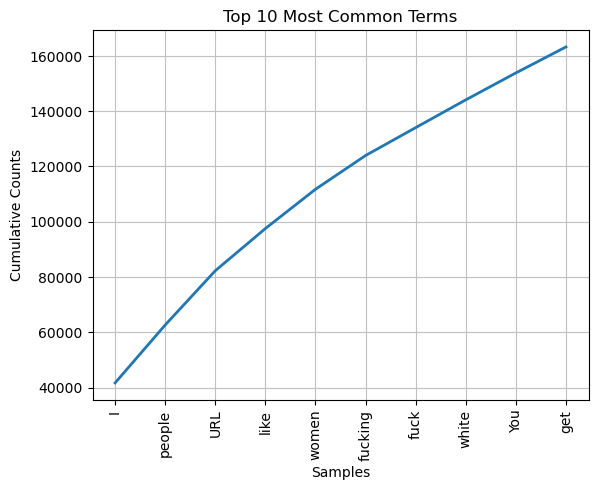

In [36]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

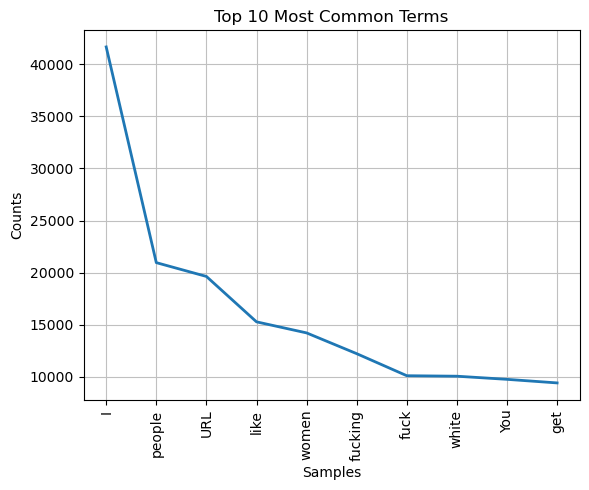

In [37]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

# Predictive Modeling

In [38]:
#join the tokens back to form the string
df2['text'] = df2['text'].apply(lambda x: ' '.join(x))

In [39]:
df2['text'].head(3)

0    Yes indeed She sort reminds elder lady played ...
1        The trans women reading tweet right beautiful
2    Question These broads criticize America countr...
Name: text, dtype: object

In [40]:
#split the data into input X and output y
X = df2['text']
y = df2['hate speech']

In [41]:
#split the data 
from sklearn.model_selection import train_test_split
seed = 183
test_size = 0.2 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df2['hate speech'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(108444,) (27112,) (108444,) (27112,)


# Use tf-idf as a feature to get into the vector space model

In [42]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=10000)

In [44]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [45]:
#check the shape
X_train.shape, X_test.shape

((108444, 10000), (27112, 10000))

# Model building: Ordinary Logistic Regression

In [46]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [47]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Model evaluation

In [48]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.89542
Accuracy Score on test set 0.87743


In [72]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     59963
         1.0       0.62      1.00      0.76     48481

    accuracy                           0.72    108444
   macro avg       0.81      0.75      0.72    108444
weighted avg       0.83      0.72      0.71    108444



# Regularization & Hyperparameter tuning

In [50]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [53]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# Fine tuned Model with Balanced Class Weights

In [54]:
#define the model with balanced class weights
weights = {0:1.0,1:1.0}
clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

/Users/ngocle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ngocle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [55]:
#retrieve the best model 
grid_result.best_estimator_

LogisticRegression(C=17.1647290112687, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [58]:
#instantiate the best model


clf = LogisticRegression(C=17.1647290112687,penalty='l1',
                         solver='liblinear',class_weight=weights)

In [59]:
#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     59963
         1.0       0.83      1.00      0.91     48481

    accuracy                           0.91    108444
   macro avg       0.91      0.92      0.91    108444
weighted avg       0.92      0.91      0.91    108444



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88     14991
         1.0       0.79      0.98      0.87     12121

    accuracy                           0.88     27112
   macro avg       0.88      0.88      0.88     27112
weighted avg       0.89      0.88      0.88     27112



# Fine tuned model with class weights proportional to the class imbalance

In [61]:
#use the class weights to handle the imbalance in the labels
weights = {0:1.0,1:13}

clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

#retrieve the best model 
grid_result.best_estimator_

/Users/ngocle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ngocle/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression(C=0.00037439067525052856, class_weight={0: 1.0, 1: 13},
                   solver='liblinear')

In [62]:
#instantiate the best model
clf = LogisticRegression(C=0.16731783677034165,penalty='l2',solver='liblinear',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     59963
         1.0       0.62      1.00      0.76     48481

    accuracy                           0.72    108444
   macro avg       0.81      0.75      0.72    108444
weighted avg       0.83      0.72      0.71    108444



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

         0.0       0.99      0.50      0.66     14991
         1.0       0.62      1.00      0.76     12121

    accuracy                           0.72     27112
   macro avg       0.80      0.75      0.71     27112
weighted avg       0.82      0.72      0.71     27112



In [68]:
# Assuming 'vectorizer' is your TfidfVectorizer instance used during training
# And 'clf' is your trained classifier

def predict_new_text(new_text):
    # Transform the new text using the same vectorizer
    new_text_vectorized = vectorizer.transform([new_text])
    
    # Predict using the classifier
    prediction = clf.predict(new_text_vectorized)
    
    # Return the predicted class
    return prediction[0]  # As we have a single instance




In [71]:
# Example usage
new_text1 = "I identify as a sandwich."
print(f"Predicted class: {predict_new_text(new_text1)}")

Predicted class: 1.0


In [69]:
# Example usage
new_text2 = "old fart."
print(f"Predicted class: {predict_new_text(new_text2)}")

Predicted class: 1.0


In [89]:
# Example usage
new_text3 = """I love this planet."""
print(f"Predicted class: {predict_new_text(new_text3)}")

Predicted class: 1.0


In [78]:
# Example usage
new_text4 = "You're so cool. / It makes me hate you so much."
print(f"Predicted class: {predict_new_text(new_text4)}")

Predicted class: 1.0


In [77]:
# Example usage
new_text5 = "Handsome, you're a mansion with a view."
print(f"Predicted class: {predict_new_text(new_text5)}")

Predicted class: 1.0


In [80]:
# Example usage
new_text6 = "I love the way you smile"
print(f"Predicted class: {predict_new_text(new_text6)}")

Predicted class: 0.0


In [87]:
# Example usage
new_text7 = "You are a beautidul rose in the garden of god."
print(f"Predicted class: {predict_new_text(new_text7)}")

Predicted class: 1.0


# Summary
- Logistic Regression with default paramaters recall = 100%
- Logistic Regression fine tuned with grid search and balanced class weights recall = 98%
- Logistic Regression fine tuned with grid search and class weights in proportion to data imbalance recall = 100%